<a href="https://colab.research.google.com/github/Anku0210/AirBnB-booking-Analysis/blob/main/Project_on_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Airbnb is an online platform which connects people who wishes to rent their houses to the people looking for accomodations in that local area.

# Import all required Liabraries


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Airbnb data for analysis.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/Airbnb NYC 2019.csv")

# Data Inspection

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df.shape

(48895, 16)

In [7]:
# Before starting of data Analysis, we should know the basic infomartion of Airbnb Dataset such number of rows & columns, datatype we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

After loading dataset, we can conclude few things after looking into the dataset

1) NaN or missing values present in the dataset
2) Dataset is divided into numerical and catogorical datatype.
3) Dataset consists of 48895 rows and 16 colums.

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Checking for missing values

In [9]:
# count of missing values in each colums
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

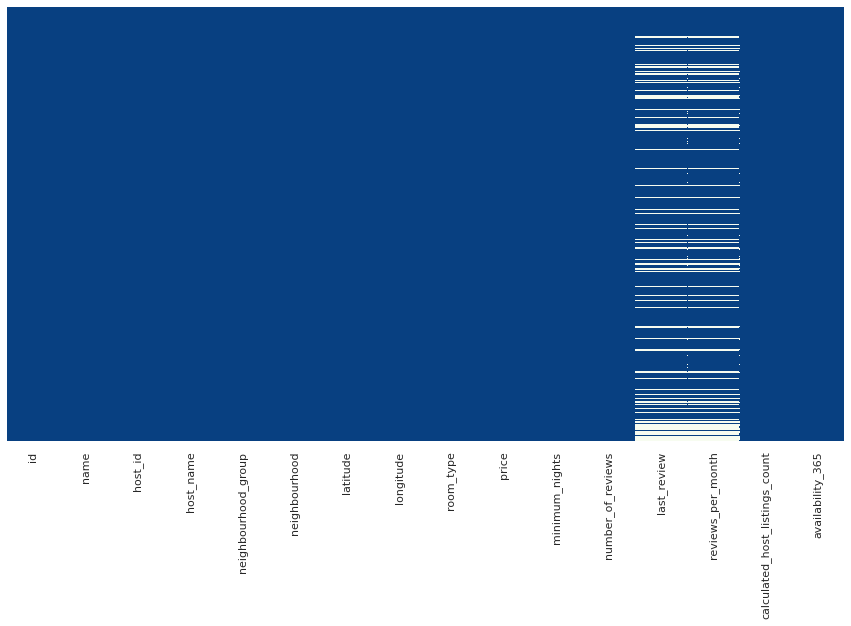

In [22]:
# plotting heat map to visualize missing values 
sns.heatmap(df.isnull(),yticklabels= False,cbar = False , cmap='GnBu_r')
sns.set(rc = {'figure.figsize':(15,8)})

Above heatmap shows clearly that most number of NaN value present in last_review and 'review per_month' columns. Now, we will have to handle this missing data before analysis.

# Univariate Analaysis of Features

**Feature no 1: Name**

This column contain the name (descreption) of the property which the host is giving on rent.

In [11]:
df.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [12]:
#geting the number of unique names from the name column 
df.name.unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

In [13]:
df.name.nunique()

47905

**Feature no 2: Host Id**

In [14]:
df.host_id

0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48895, dtype: int64

In [15]:
df.host_id.nunique()

37457

**Feature no 3: Host Name**

In [16]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

In [17]:
df.host_name.unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

In [18]:
df.host_name.nunique()

11452

**Feature no 4: Neighbourhood Group**

In [19]:
df.neighbourhood_group

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [63]:
#geting unique neighborhood groups from the neighborhood_groups column 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [64]:
df.neighbourhood_group.nunique()

5

We can see that the neighbourhood group has 5 neighbour areas. So we can find out which neighbour area has most number of rooms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


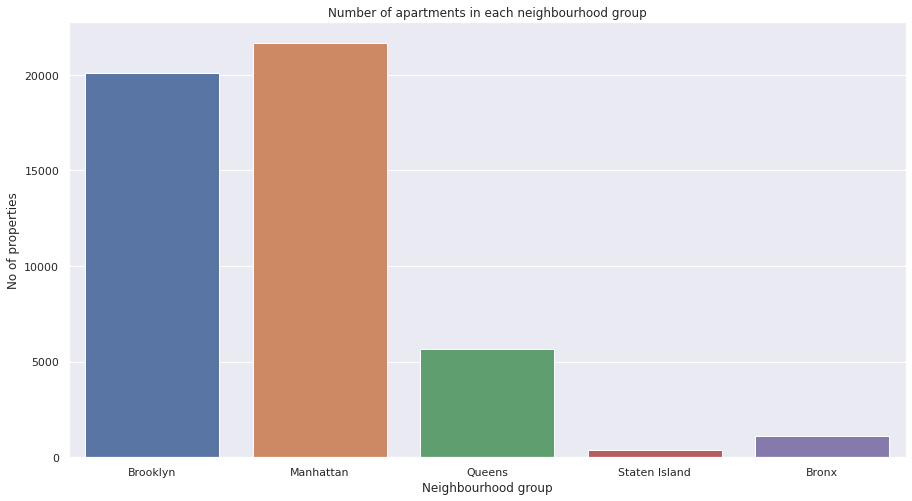

In [65]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(df.neighbourhood_group).set_title("Number of apartments in each neighbourhood group")
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood group')
plt.show()

Observation: From the above plot we can conclude that Manhattan has most number of propeties followed by Brooklyn, Queens, Bronx and Staten Island

**Feature no 5: Neighbourhood**



In [66]:
df.neighbourhood

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48895, dtype: object

In [67]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [69]:
df.neighbourhood.nunique()

221

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


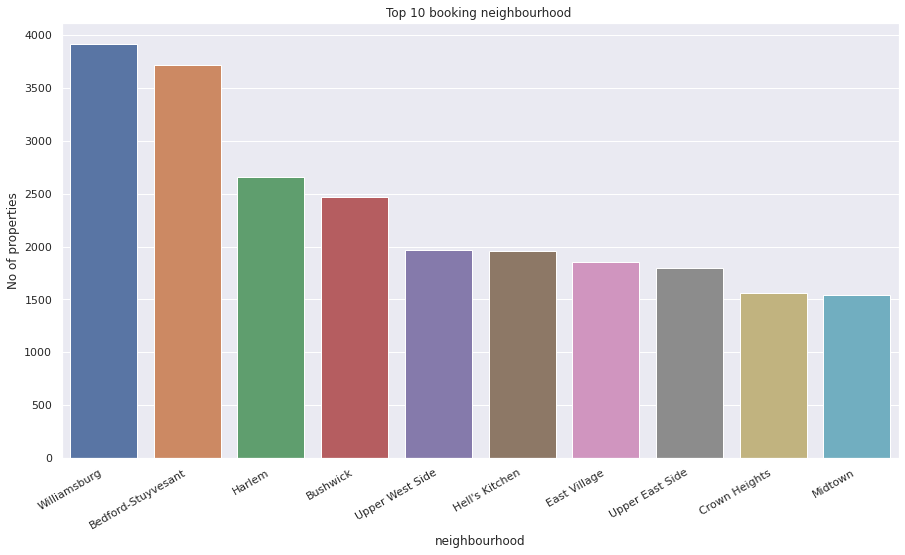

<Figure size 1080x576 with 0 Axes>

In [70]:
sns.countplot( df.neighbourhood, order =df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 booking neighbourhood ') 
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.figure(figsize=(15,8)) 
plt.show()

In [71]:
# now we have to store similar neighbourhood in their respective neighbour group in different dataframes
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group_df=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group_df=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group_df=df.loc[df['neighbourhood_group']== 'Bronx']

In [72]:
brooklyn_group_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48882,36482231,Bushwick _ Myrtle-Wyckoff,66058896,Luisa,Brooklyn,Bushwick,40.69652,-73.91079,Private room,40,20,0,NaT,NaN,1,31
48884,36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,NaT,NaN,1,341
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaT,NaN,3,365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9


Text(0.5, 0, 'Neighbourhood')

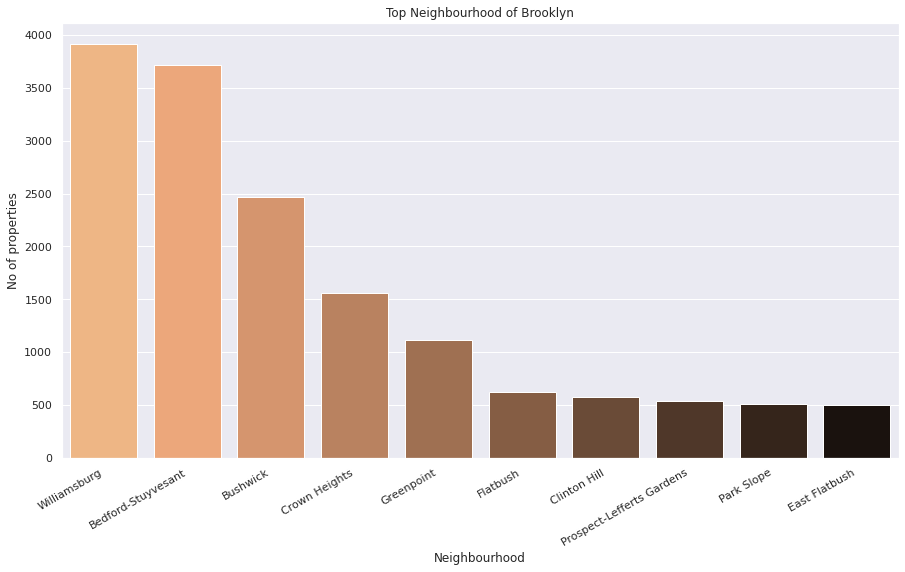

In [73]:
sns.countplot(x="neighbourhood", data=brooklyn_group_df, palette="copper_r",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Brooklyn")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

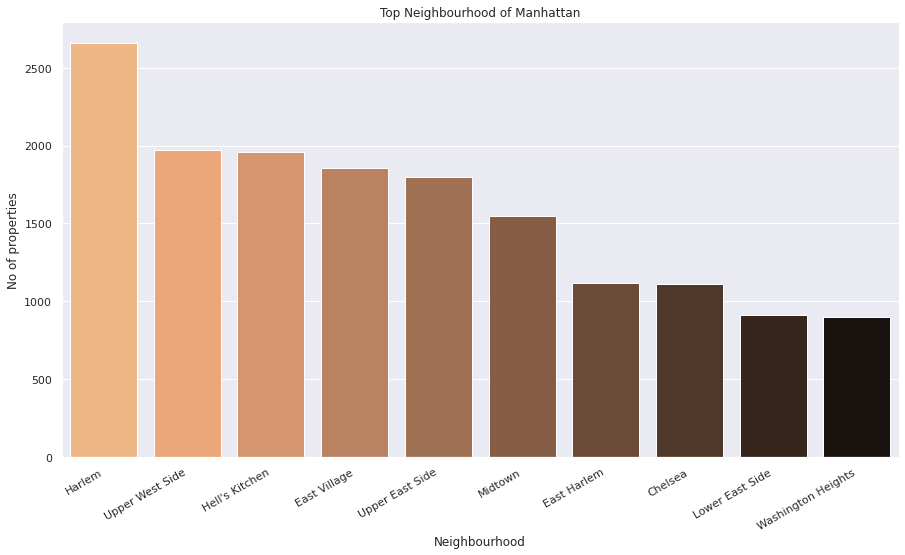

In [74]:
sns.countplot(x="neighbourhood", data=manhattan_group_df, palette="copper_r",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Manhattan")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

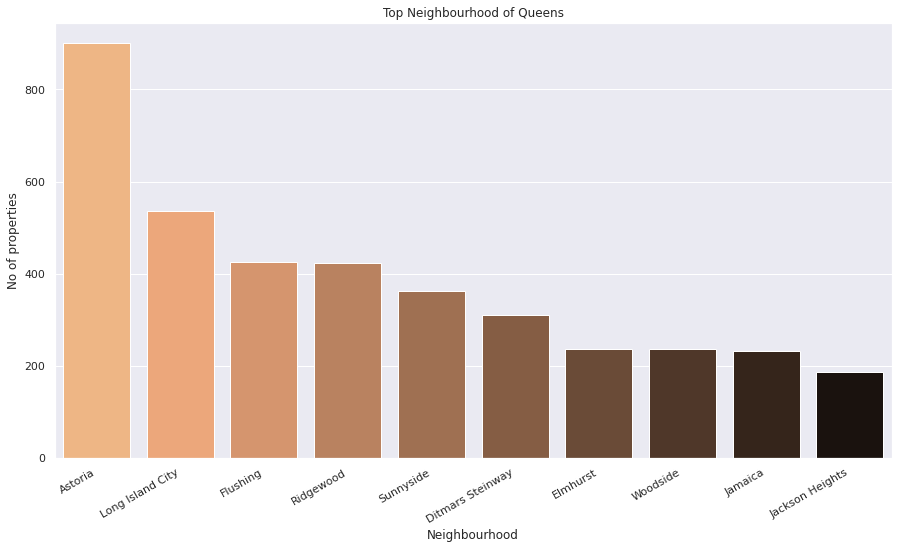

In [75]:
sns.countplot(x="neighbourhood", data=Queens_group_df, palette="copper_r",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Queens")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

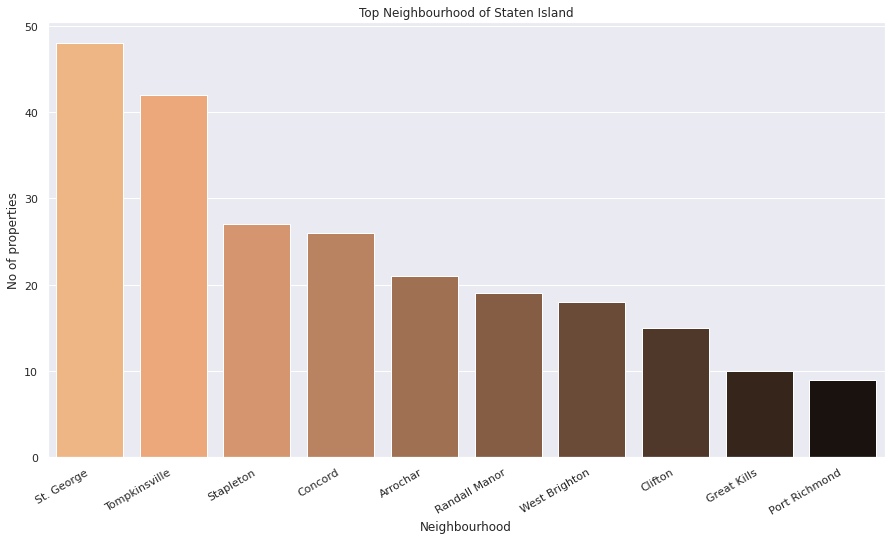

In [76]:
sns.countplot(x="neighbourhood", data=Staten_Island_group_df, palette="copper_r",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Staten Island")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

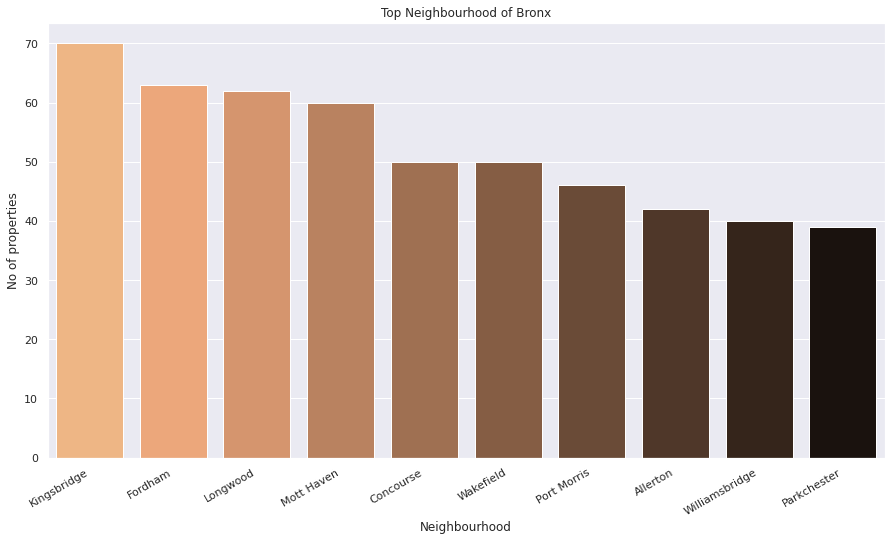

In [77]:
sns.countplot(x="neighbourhood", data=Bronx_group_df, palette="copper_r",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Bronx")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood')

In [78]:
df.neighbourhood.value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'Top 10 Bronx neighbourhood value count')

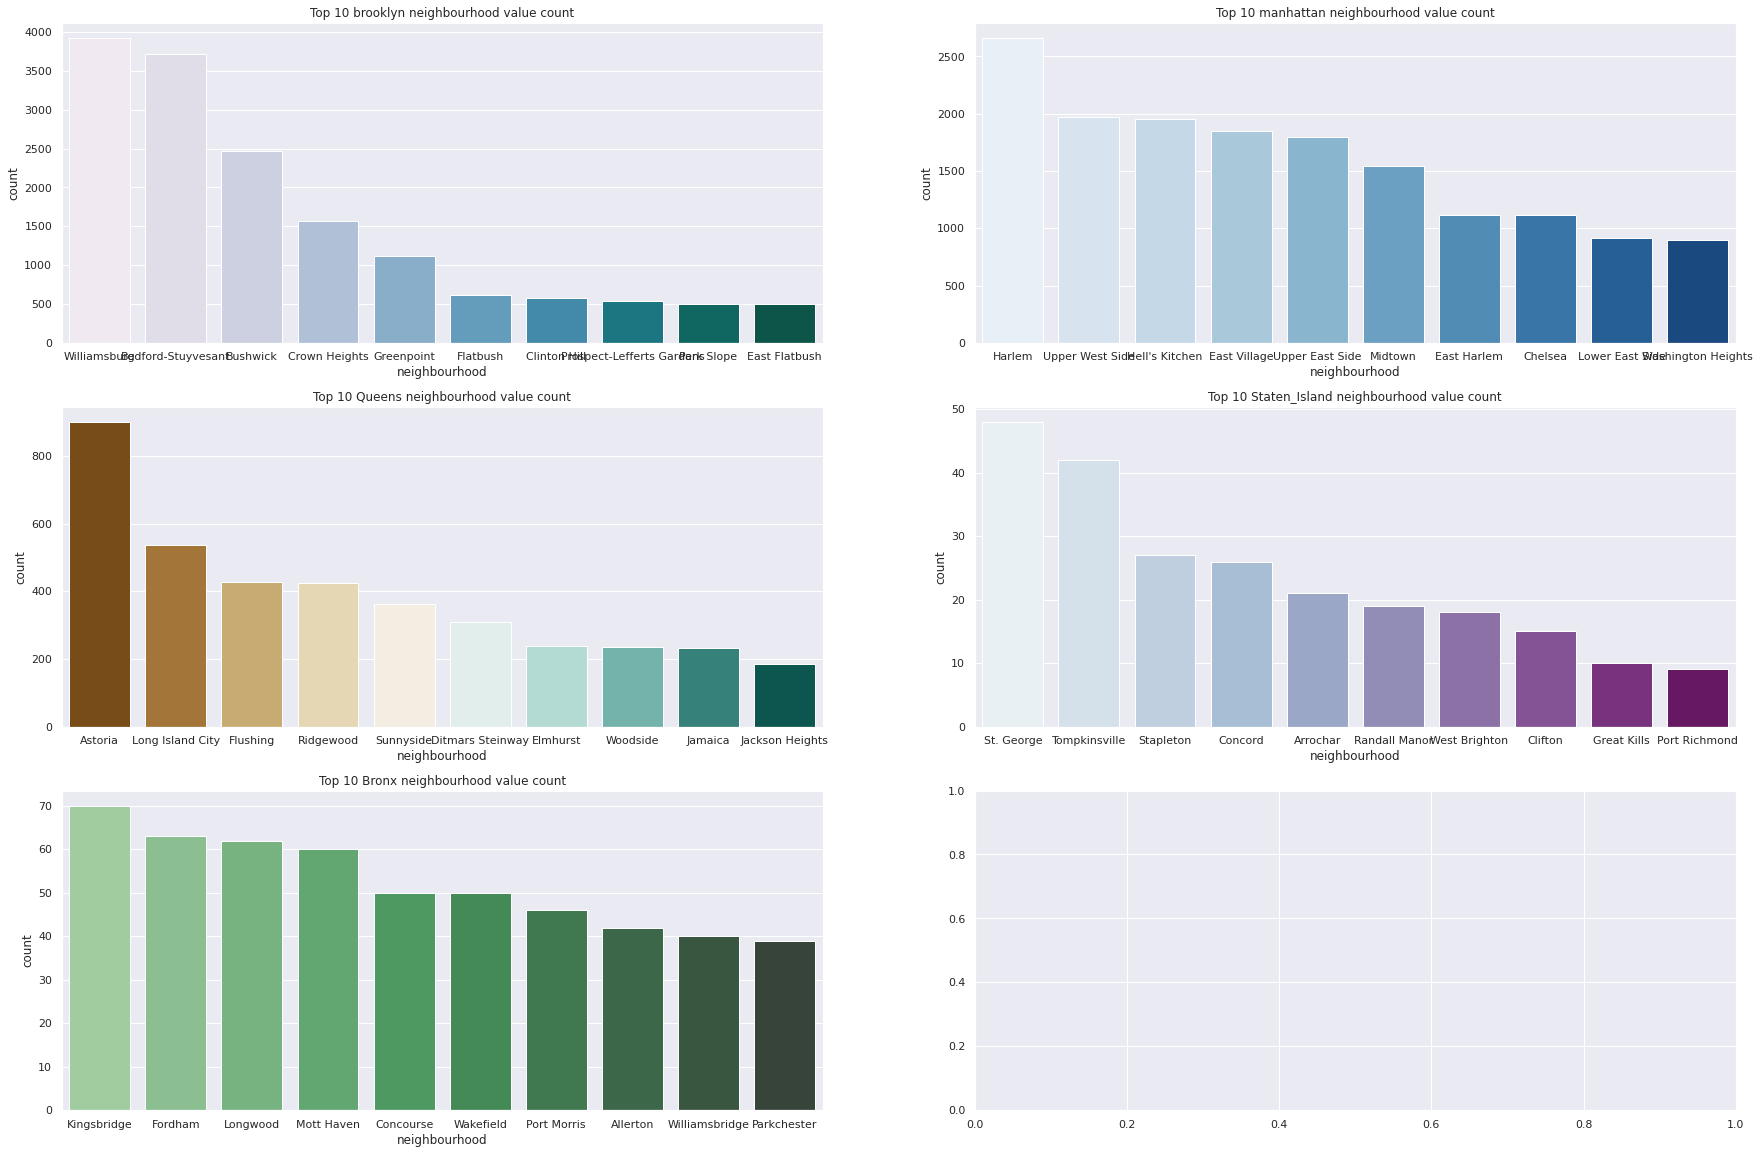

In [79]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],x="neighbourhood", data=brooklyn_group_df, palette="PuBuGn",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 brooklyn neighbourhood value count')
              
              
sns.countplot(ax=axes[0,1],x="neighbourhood", data=manhattan_group_df, palette="Blues",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],x="neighbourhood", data=Queens_group_df, palette="BrBG",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],x="neighbourhood", data=Staten_Island_group_df, palette="BuPu",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],x="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Bronx neighbourhood value count')

Observations from the above graphs are as follow:

Willamsburg, Bedford and Bushwick have most no of bookings in brooklyn neighbourhood_group.







**Column no 6 & 7: Latitude and Longitude**

In [80]:
df.latitude.describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

In [81]:
df.longitude.describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


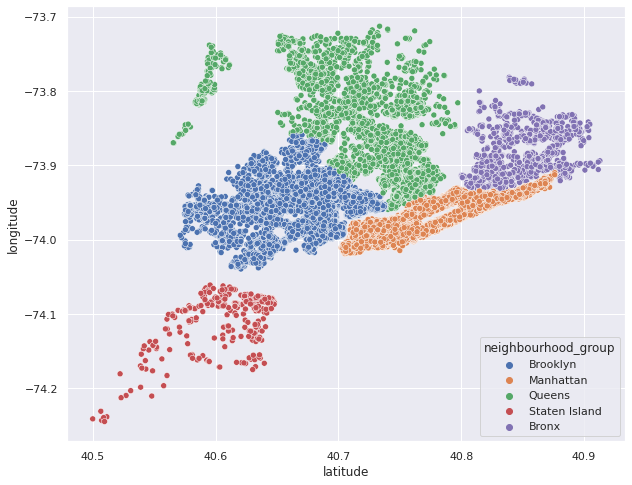

In [82]:
# Pointing the plot on graph through scattering plot
plt.figure(figsize=(10,8))
sns.scatterplot(df.latitude,df.longitude, hue='neighbourhood_group', data=df)

Text(0.5, 1.0, 'Density of No of properties')

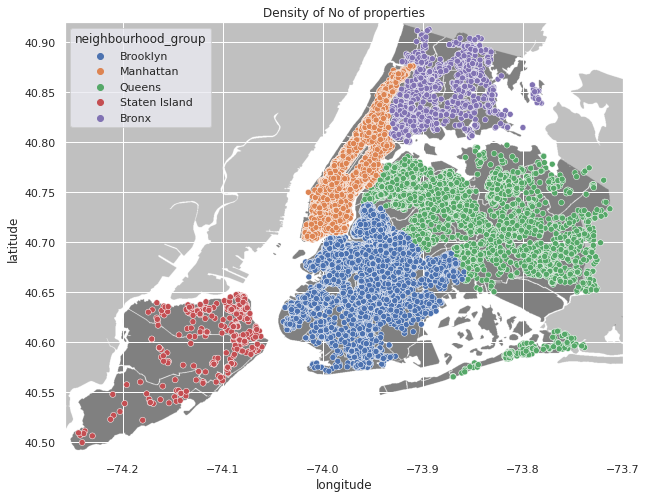

In [83]:
# Importing image 
import urllib
# setting  figure size
plt.figure(figsize=(10,8))
# setting  background map image in graph
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
image=plt.imread(img)
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
sns.scatterplot(data = df,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of No of properties')

**Column no 8 : Room Type**

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Type of rooms')

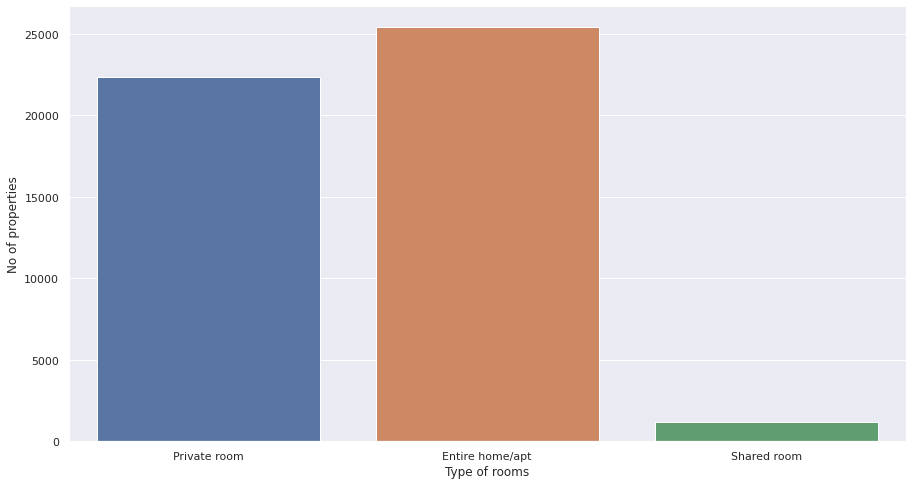

In [84]:
#number of rooms_type provided by the hosts
print(df.room_type.value_counts())
sns.countplot(df.room_type)
#adding x and y labels to the plot
plt.ylabel('No of properties') 
plt.xlabel('Type of rooms') 

Text(0.5, 1.0, 'Top 10 Bronx neighbourhood value count')

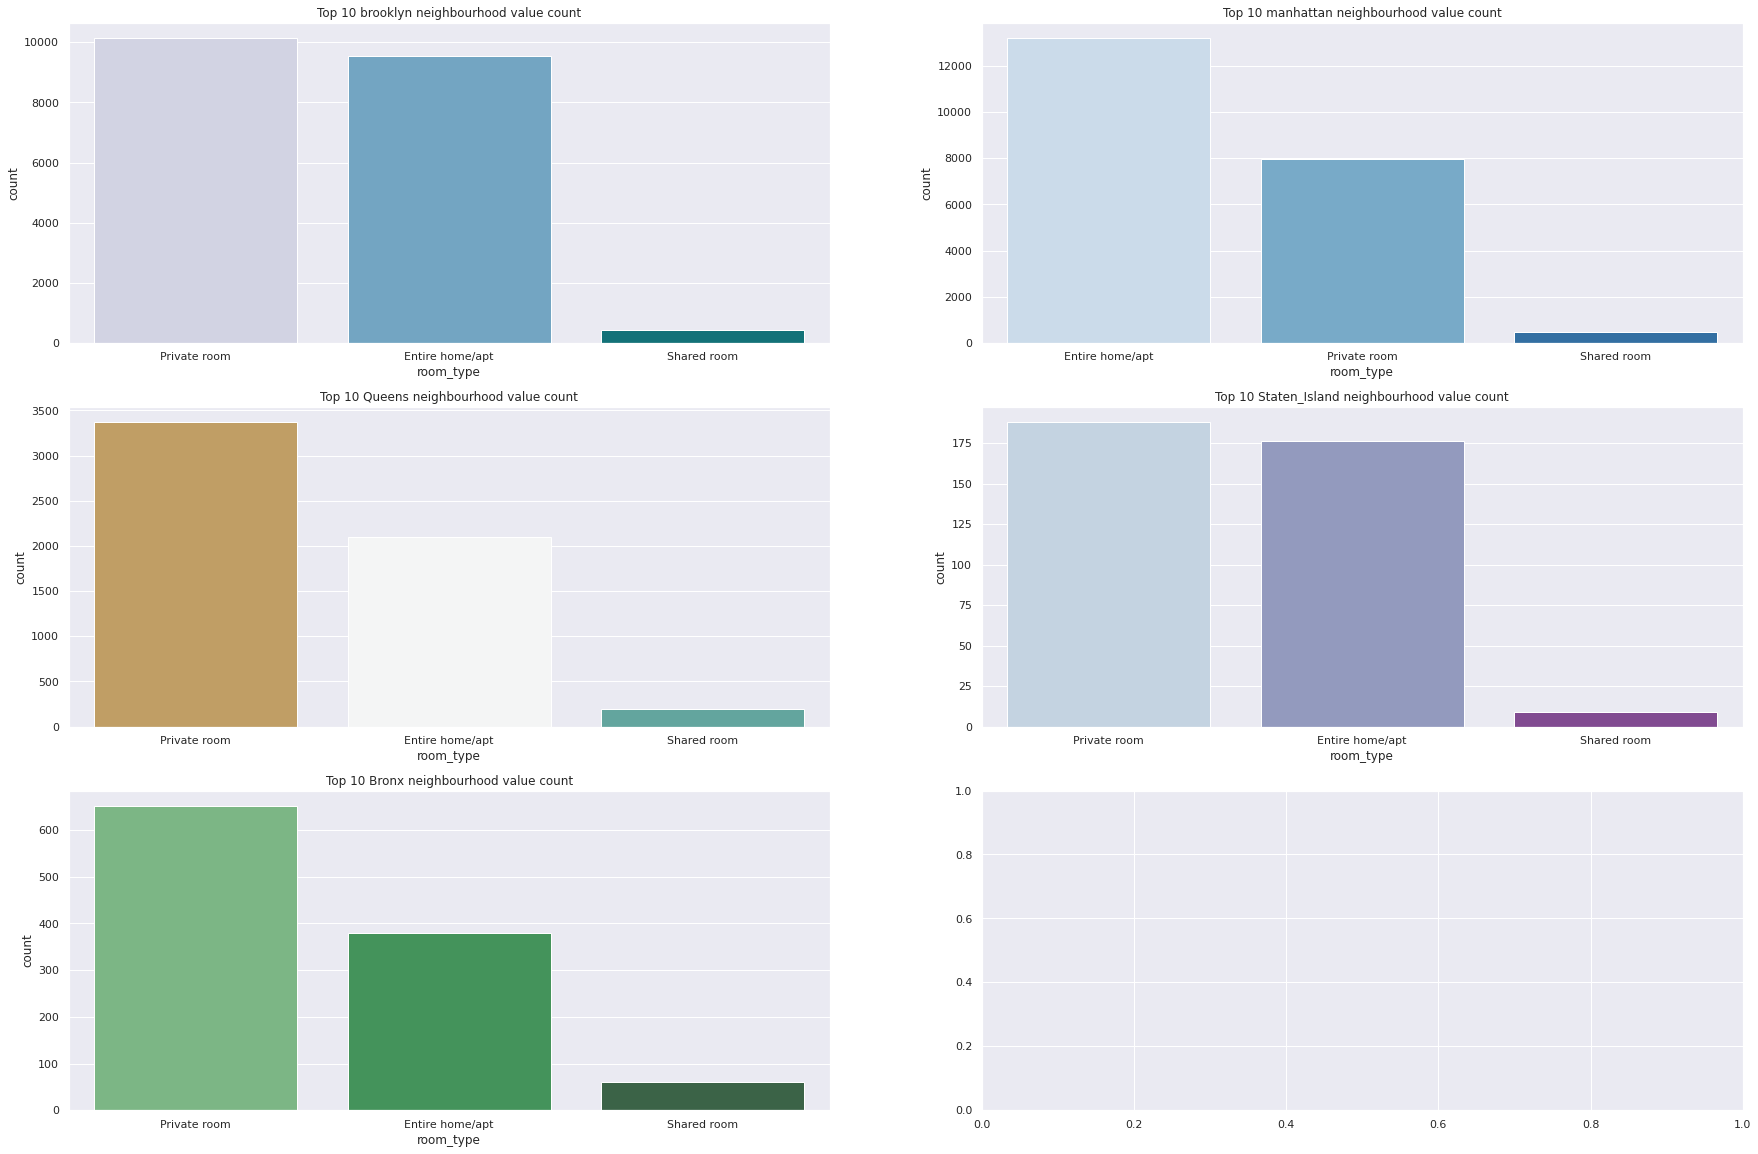

In [85]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],x="room_type", data=brooklyn_group_df, palette="PuBuGn",
              order=brooklyn_group_df.room_type.value_counts().iloc[:3].index).set_title('Top 10 brooklyn neighbourhood value count')
              
              
sns.countplot(ax=axes[0,1],x="room_type", data=manhattan_group_df, palette="Blues",
              order=manhattan_group_df.room_type.value_counts().iloc[:3].index).set_title('Top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],x="room_type", data=Queens_group_df, palette="BrBG",
              order=Queens_group_df.room_type.value_counts().iloc[:3].index).set_title('Top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],x="room_type", data=Staten_Island_group_df, palette="BuPu",
              order=Staten_Island_group_df.room_type.value_counts().iloc[:3].index).set_title('Top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],x="room_type", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.room_type.value_counts().iloc[:3].index).set_title('Top 10 Bronx neighbourhood value count')

**Column no 9: Price**

Text(0, 0.5, 'No of properties')

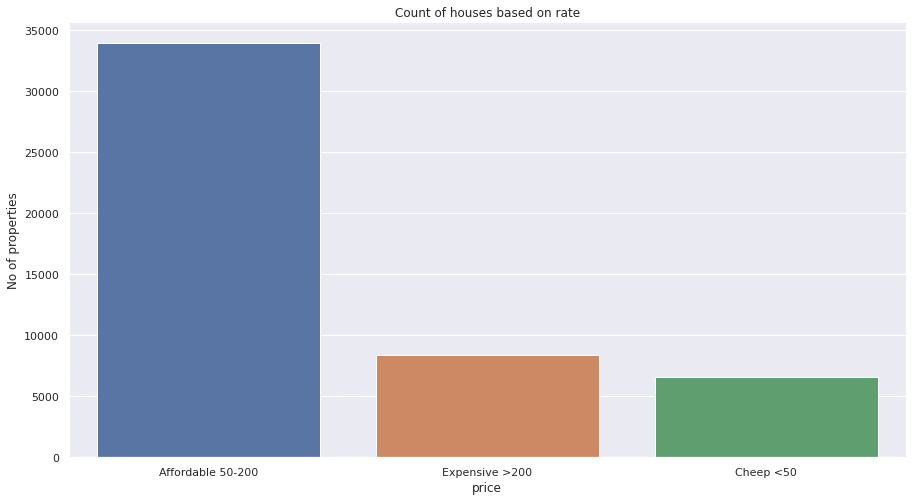

In [86]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep <50'
  elif price>=50 and price<=200:
    return 'Affordable 50-200'
  else:
    return 'Expensive >200'
#creating a count plot 
sns.countplot(x=df.price.apply(price_catagory)).set_title('Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of properties') 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


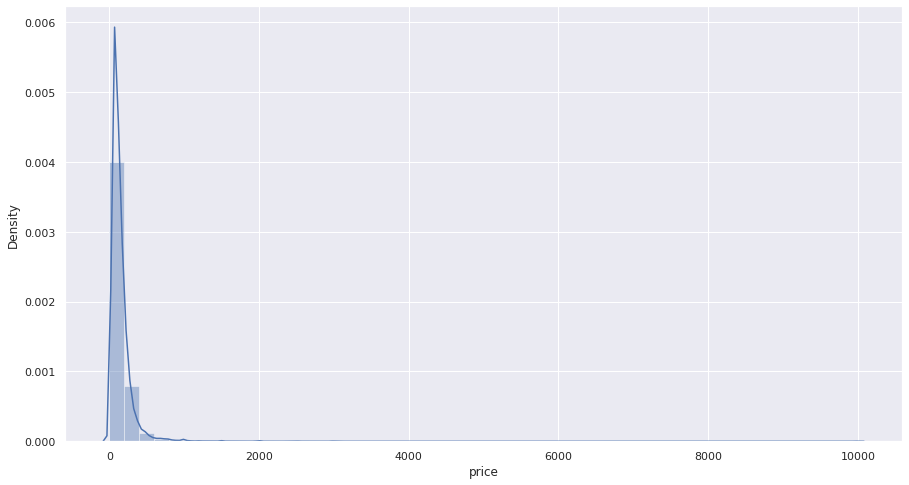

In [87]:
sns.distplot(df.price)

**Feature no 10: Minimum Nights**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of properties')

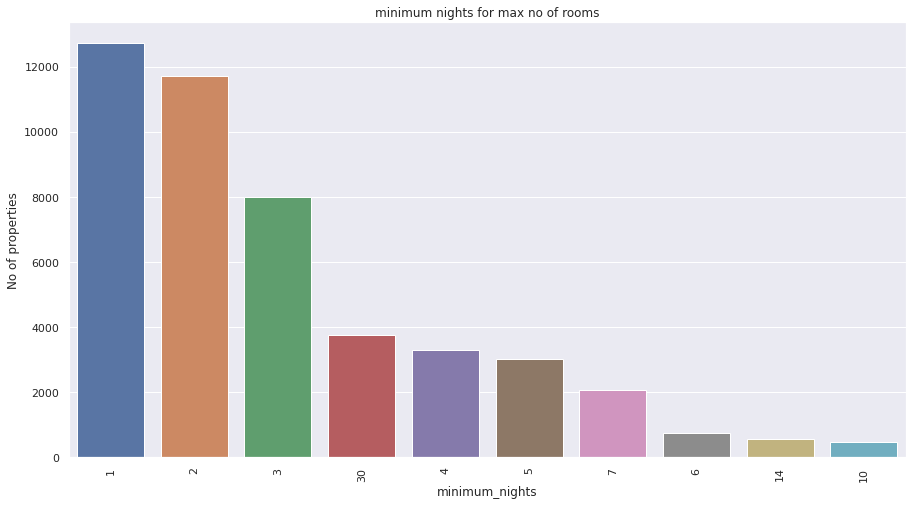

In [88]:
#creating a count plot 
sns.countplot(df.minimum_nights,order=df.minimum_nights.value_counts().iloc[:10].index).set_title('minimum nights for max no of rooms')
#rotating x lables 
plt.xticks(rotation=90)
#adding x and y labels to the plot
plt.ylabel('No of properties')

**Feature no 11: Number of Reviews**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


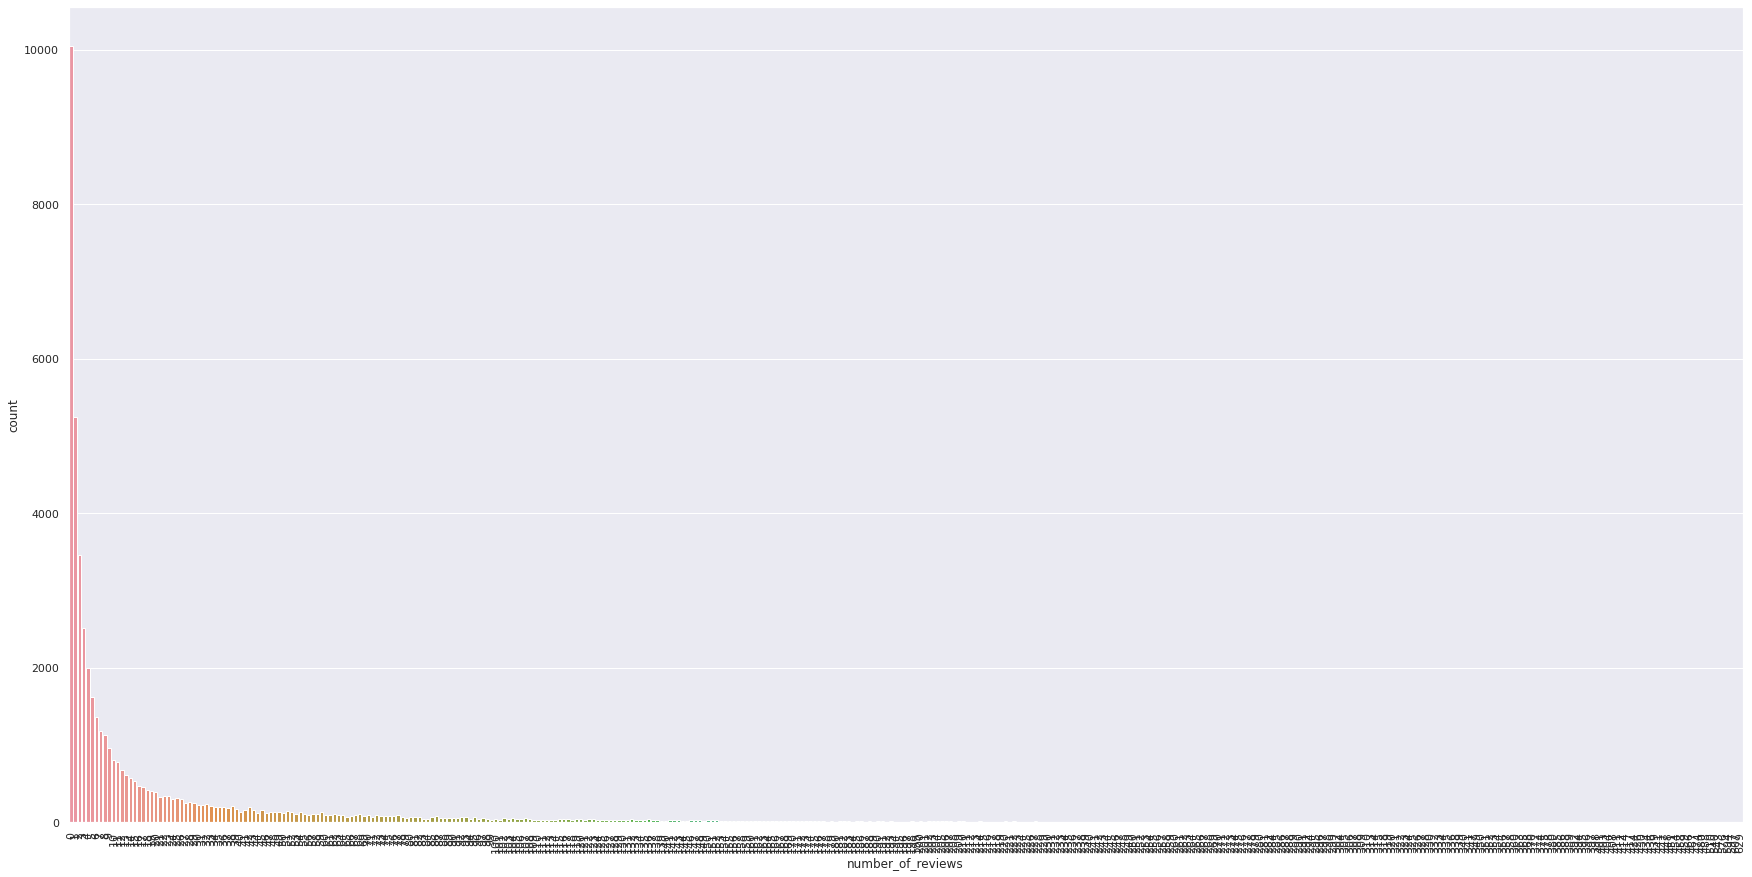

In [89]:
#settingt he size of the figure 
plt.figure(figsize=(30,15))
#creating a caunt plot
sns.countplot(df.number_of_reviews)
#rotating the x lables
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


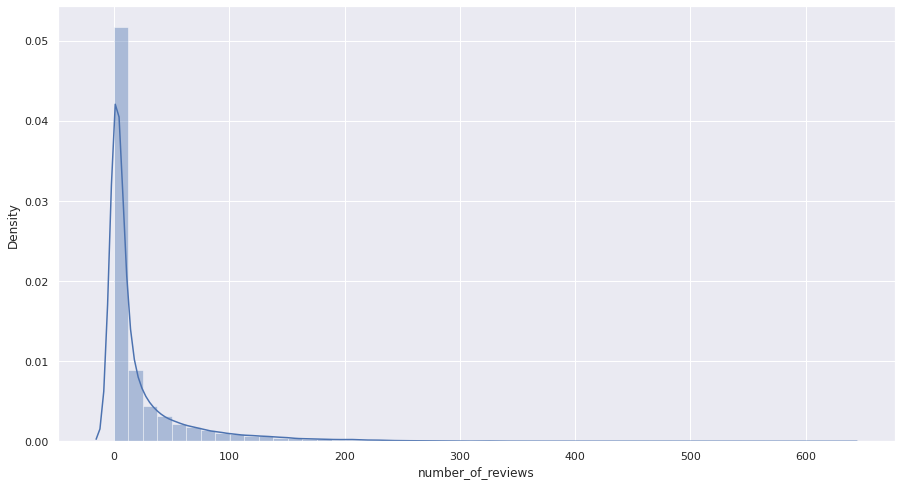

In [90]:
#creating a dist plot
sns.distplot(df.number_of_reviews)

In [91]:
#properties recieving highest reviews.
highest_reviews = df.sort_values(by='number_of_reviews', ascending=False)
highest_reviews.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173


**Feature no 12: Last Review**

In [92]:
df['last_review']=pd.to_datetime(df['last_review'])
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [93]:
#printing the least and most recent review date
least_recent_date = df['last_review'].min()
most_recent_date = df['last_review'].max()
print(f'the least recent date is {least_recent_date.date()} and the most recent date is {most_recent_date.date()} in last review')

the least recent date is 2011-03-28 and the most recent date is 2019-07-08 in last review


In [94]:
df[df.last_review < '2015-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 20 to 6546
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              279 non-null    int64         
 1   name                            279 non-null    object        
 2   host_id                         279 non-null    int64         
 3   host_name                       279 non-null    object        
 4   neighbourhood_group             279 non-null    object        
 5   neighbourhood                   279 non-null    object        
 6   latitude                        279 non-null    float64       
 7   longitude                       279 non-null    float64       
 8   room_type                       279 non-null    object        
 9   price                           279 non-null    int64         
 10  minimum_nights                  279 non-null    int64         
 11  numb

In [95]:
df[df.last_review.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10052 non-null  int64         
 1   name                            10042 non-null  object        
 2   host_id                         10052 non-null  int64         
 3   host_name                       10047 non-null  object        
 4   neighbourhood_group             10052 non-null  object        
 5   neighbourhood                   10052 non-null  object        
 6   latitude                        10052 non-null  float64       
 7   longitude                       10052 non-null  float64       
 8   room_type                       10052 non-null  object        
 9   price                           10052 non-null  int64         
 10  minimum_nights                  10052 non-null  int64         
 11  nu

Feature no 13:


In [96]:
df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

Text(0, 0.5, 'No of rooms')

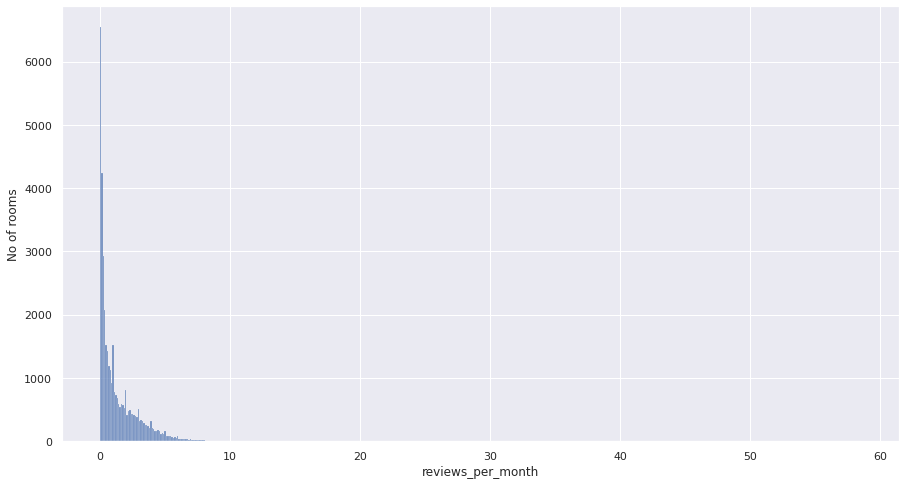

In [97]:
#creating histplot and adding lablesto y axis
sns.histplot(df[df['reviews_per_month']>0].reviews_per_month)
plt.ylabel('No of rooms')